# Titanic Survival Analysis
Exploratory Data Analysis and Visualizations using the Titanic dataset from Kaggle.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load dataset (public mirror of Kaggle Titanic train set)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-11-1857681847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-11-1857681847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

## Basic Statistics

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Visualizations

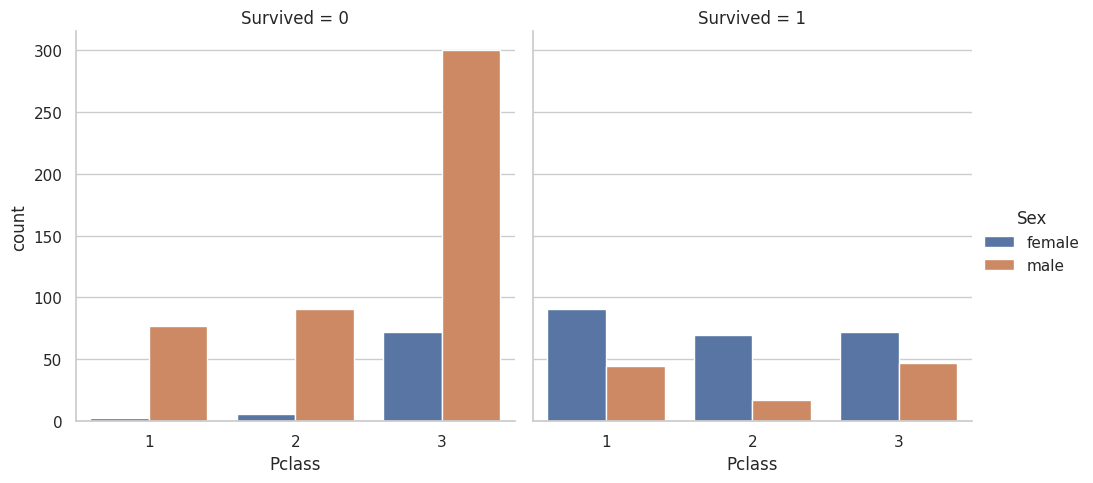

In [13]:
# Survival by Gender & Class
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count');
plt.show()

/tmp/ipython-input-14-3154707623.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Survived == 1]['Age'], label='Survived', shade=True)
/tmp/ipython-input-14-3154707623.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.Survived == 0]['Age'], label='Died', shade=True)


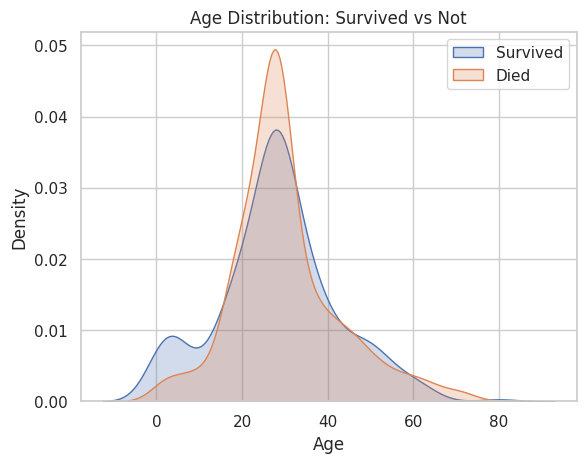

In [14]:
# Age Distribution by Outcome
sns.kdeplot(data=df[df.Survived == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(data=df[df.Survived == 0]['Age'], label='Died', shade=True)
plt.legend()
plt.title('Age Distribution: Survived vs Not');
plt.show()

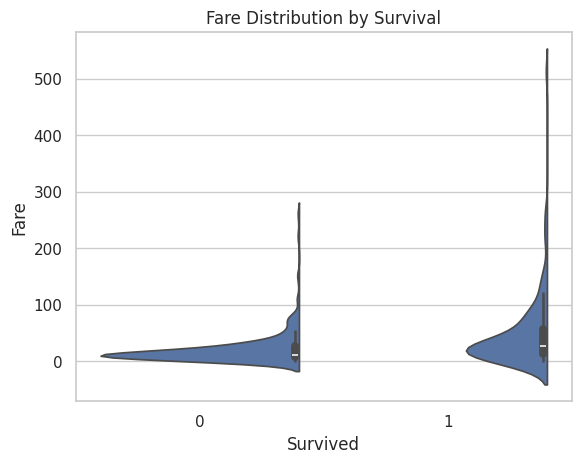

In [15]:
# Fare Distribution by Survival
sns.violinplot(x='Survived', y='Fare', data=df, split=True)
plt.title('Fare Distribution by Survival');
plt.show()

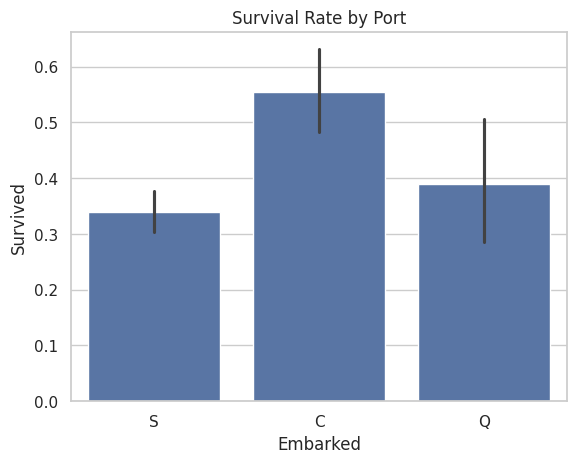

In [16]:
# Survival Rate by Embarked Port
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port');
plt.show()

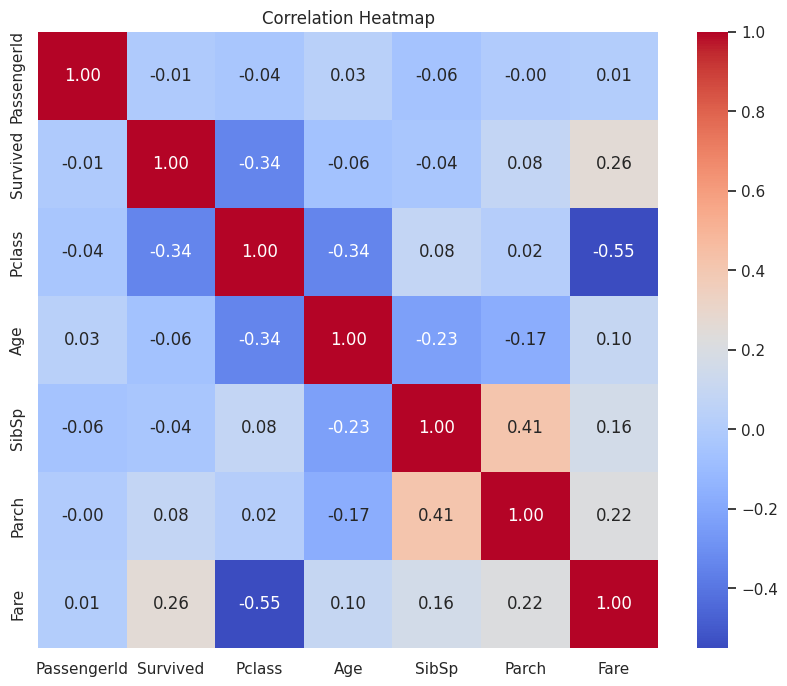

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Heatmap');
plt.show()


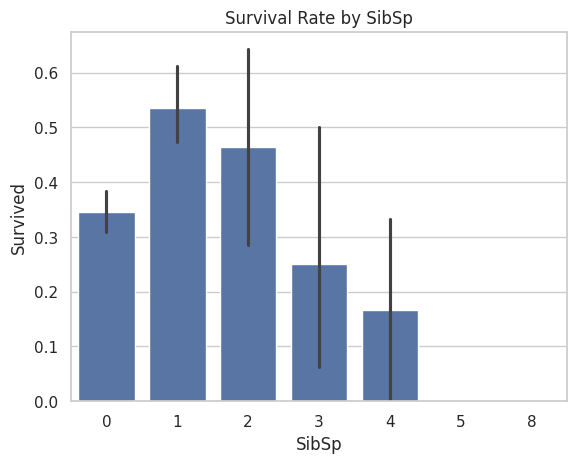

In [18]:

# Survival Rate by Number of Siblings/Spouses (SibSp)
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp');
plt.show()



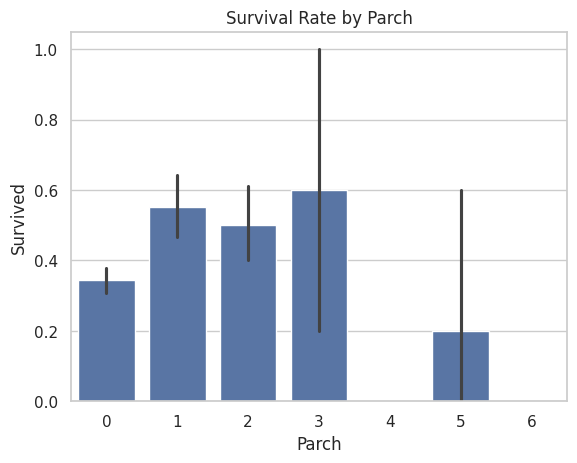

In [19]:
# Survival Rate by Number of Parents/Children (Parch)
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch');
plt.show()



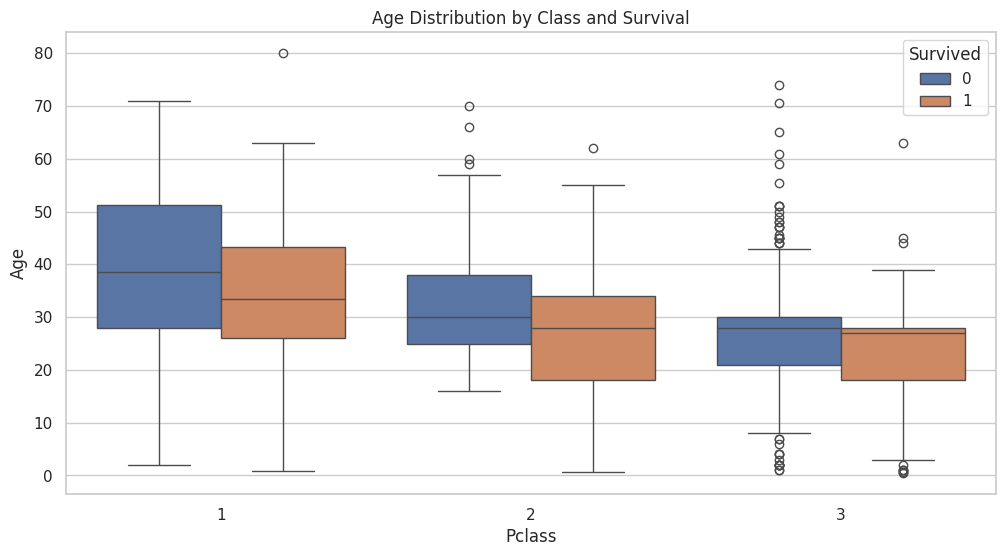

In [20]:
# Survival by Class and Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df);
plt.title('Age Distribution by Class and Survival');
plt.show()



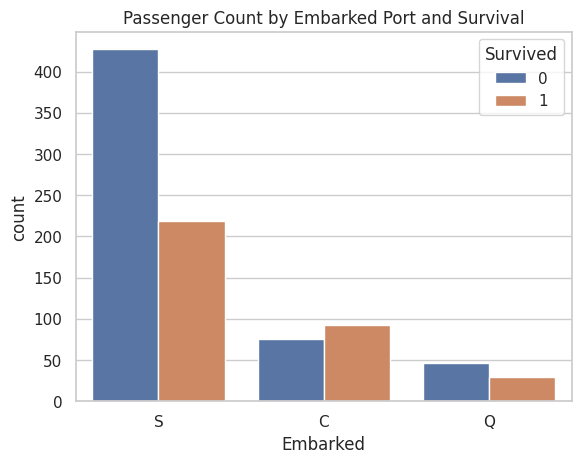

In [21]:
# Count of Passengers by Embarked Port
sns.countplot(x='Embarked', data=df, hue='Survived');
plt.title('Passenger Count by Embarked Port and Survival');
plt.show()


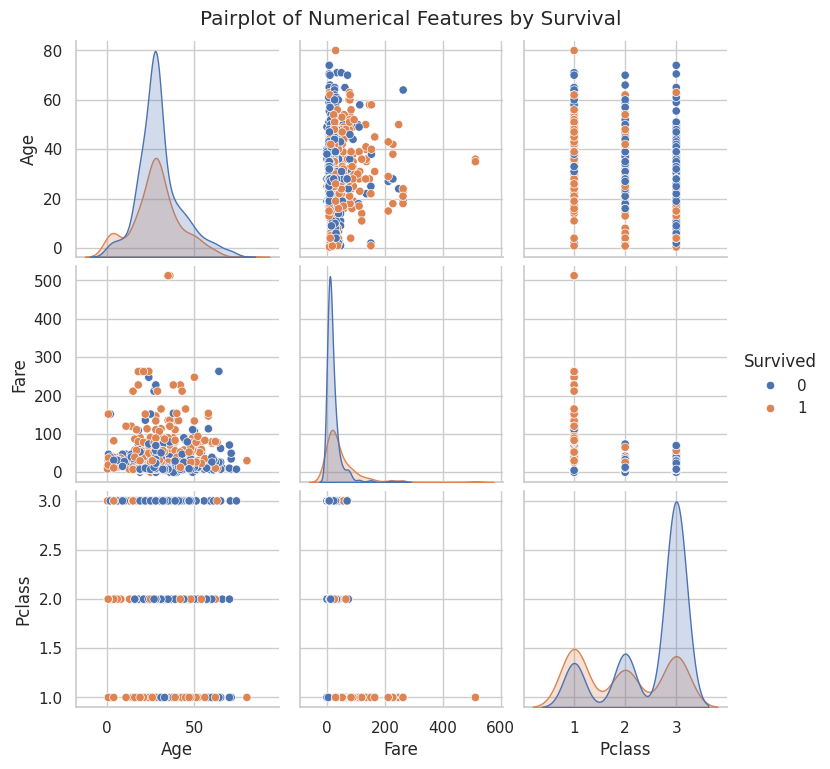

In [22]:

# Pairplot of Numerical Features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde');
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02);
plt.show()

### Conclusion
- Gender and ticket class were strong predictors of survival.
- Children and passengers paying higher fares had better survival odds.